In [ ]:
#exp-5 (a program for Bias, Variance, Remove duplicates, Cross Validation)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = np.random.rand(100, 10)
y = np.random.rand(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.3f}")

y_pred_train = model.predict(X_train)
bias = np.mean((y_pred_train - y_train) ** 2)
variance = np.mean((y_pred - y_test) ** 2)
print(f"Bias: {bias:.3f}")
print(f"Variance: {variance:.3f}")

X_no_duplicates, indices = np.unique(X, axis=0, return_index=True)
y_no_duplicates = y[indices]
print(f"Number of duplicates removed: {X.shape[0] -X_no_duplicates.shape[0]}")

from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
mse_scores = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mse_scores.append(mse)
print(f"Cross-validation mean squared error:{np.mean(mse_scores):.3f}")

Mean squared error: 0.089
Bias: 0.091
Variance: 0.089
Number of duplicates removed: 0
Cross-validation mean squared error:0.118


In [ ]:
#exp-6 (a program to implement Categorical Encoding, One-hot encoding)
import pandas as pd
data = {'gender': ['male', 'female', 'male', 'male', 'female']}
df = pd.DataFrame(data)
# perform categorical encoding using pandas' 'astype' method
df['gender_encoded'] = df['gender'].astype('category').cat.codes
print(df)
# perform one-hot encoding using pandas' 'get_dummies' function
df_onehot = pd.get_dummies(df, columns=['gender'])
print(df_onehot)

   gender  gender_encoded
0    male               1
1  female               0
2    male               1
3    male               1
4  female               0
   gender_encoded  gender_female  gender_male
0               1              0            1
1               0              1            0
2               1              0            1
3               1              0            1
4               0              1            0


In [ ]:
#exp-7 (an Artificial Neural Network by implementing the Back propagation algorithm and test the sameusing appropriate data sets.)
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0) # maximum of X array longitudinally
y = y/100
#Sigmoid Function
def sigmoid (x):
  return (1/(1 + np.exp(-x)))
#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
  return x * (1 - x)
#Variable initialization
epoch=7000 #Setting training iterations
lr=0.1 #Setting learning rate
inputlayer_neurons = 2 #number of features in data set
hiddenlayer_neurons = 3 #number of hidden layers neurons
output_neurons = 1
#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons
))
bout=np.random.uniform(size=(1,output_neurons))
for i in range(epoch):
  hinp1=np.dot(X,wh)
  hinp=hinp1 + bh
  hlayer_act = sigmoid(hinp)
  outinp1=np.dot(hlayer_act,wout)
  outinp= outinp1+ bout
output = sigmoid(outinp)
EO = y-output
outgrad = derivatives_sigmoid(output)
d_output = EO* outgrad
EH = d_output.dot(wout.T)
hiddengrad = derivatives_sigmoid(hlayer_act)
d_hiddenlayer = EH * hiddengrad
wout += hlayer_act.T.dot(d_output) *lr
bout += np.sum(d_output, axis=0,keepdims=True) *lr
wh += X.T.dot(d_hiddenlayer) *lr
print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n",output)


Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.86514832]
 [0.84924448]
 [0.86164087]]


In [ ]:
#exp-8 (to implement k-Nearest Neighbor algorithm to classify the iris data set.both correct & wrong values to print)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import datasets
iris=datasets.load_iris()
x=iris.data
y=iris.target
print('sepal-length','speal-width','petal-length','petal-width')
print(x)
print('class: 0-Iris-Setosa, 1-Iris-Versicolor, 2- Iris-Virginica')
print(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
classifier=KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print("Results of Classification using K-NN with k=5")
for r in range(0,len(x_test)):
  print("Sample:",str(x_test[r]),"Actual-label:",str(y_test[r]),"Predicted-label:",str(y_pred[r]))
  print("Classification Accuracy:",classifier.score(x_test,y_test));
  print('Confusion matrix is as follows')
  print(confusion_matrix(y_test,y_pred))
  print('Accuracy Matrics')
  print(classification_report(y_test,y_pred))

sepal-length speal-width petal-length petal-width
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]


Text(0, 0.5, 'Tip')

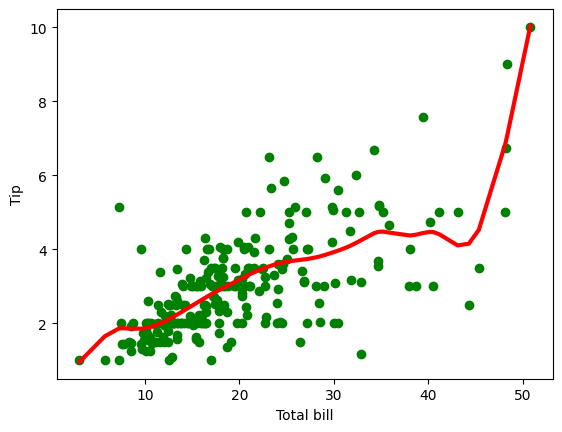

In [ ]:
# exp-9(non-parametric Locally Weighted Regression algorithm & draw graphs.)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def kernel(point,xmat, k):
  m,n= np.shape(xmat)
  weights = np.mat(np.eye((m)))
  for j in range(m):
    diff = point - X[j]
    weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
  return weights
def localWeight(point,xmat,ymat,k):
  wei = kernel(point,xmat,k)
  W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
  return W
def localWeightRegression(xmat,ymat,k):
  m,n = np.shape(xmat)
  ypred = np.zeros(m)
  for i in range(m):
    ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
  return ypred
data = pd.read_csv('tips.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)
mbill = np.mat(bill)
mtip = np.mat(tip)
m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X= np.hstack((one.T,mbill.T))
ypred = localWeightRegression(X,mtip,2)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='green')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=3)
plt.xlabel('Total bill')
plt.ylabel('Tip')


# New section

In [1]:
# Exp-10 a set of documents that need to be classified, use the naïve Bayesian Classifier model
import pandas as pd
msg = pd.read_csv(r'dataset.csv', names=['message','label'])
print("Total Instances of Dataset: ", msg.shape[0])
msg['labelnum'] = msg.label.map({'pos': 1, 'neg': 0})
X = msg.message
y = msg.labelnum
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
from sklearn.feature_extraction.text import CountVectorizer
count_v = CountVectorizer()
Xtrain_dm = count_v.fit_transform(Xtrain)
Xtest_dm = count_v.transform(Xtest)
df =pd.DataFrame(Xtrain_dm.toarray(),columns=count_v.get_feature_names_out())
print(df[0:5])
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(Xtrain_dm, ytrain)
pred = clf.predict(Xtest_dm)
for doc, p in zip(Xtrain, pred):
  p = 'pos' if p == 1 else 'neg'
  print("%s -> %s" % (doc, p))
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score
print('Accuracy Metrics: \n')
print('Accuracy: ', accuracy_score(ytest, pred))
print('Recall: ', recall_score(ytest, pred))
print('Precision: ', precision_score(ytest, pred))
print('Confusion Matrix: \n', confusion_matrix(ytest, pred))

Total Instances of Dataset:  18
   about  am  amazing  an  and  awesome  bad  beers  best  can  ...  tired  \
0      0   0        0   1    0        1    0      0     0    0  ...      0   
1      0   0        0   0    0        0    0      0     0    0  ...      0   
2      0   0        0   0    0        0    0      0     0    0  ...      0   
3      0   1        0   0    1        0    0      0     0    0  ...      1   
4      0   1        0   0    0        0    0      0     0    0  ...      1   

   to  today  tomorrow  very  we  went  will  with  work  
0   0      0         0     0   0     0     0     0     0  
1   0      0         1     0   1     0     1     0     0  
2   0      0         0     0   0     0     0     0     0  
3   0      0         0     0   0     0     0     0     0  
4   0      0         0     0   0     0     0     0     0  

[5 rows x 46 columns]
This is an awesome place -> pos
We will have good fun tomorrow -> neg
He is my sworn enemy -> neg
I am sick and tired of t

In [2]:
# Exp- 11 Apply EM algorithm to cluster a Heart Disease Data Set.
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
data = pd.DataFrame({
    "Age": [40, 49, 37, 48],
    "Sex": ["M", "F", "M", "F"],
    "ChestPainType": ["ATA", "NAP", "ATA", "ASY"],
    "RestingBP": [140, 160, 130, 138],
    "Cholesterol": [289, 180, 283, 214],
    "FastingBS": [0, 0, 0, 0],
    "RestingECG": ["Normal", "Normal", "ST", "Normal"],
    "MaxHR": [172, 156, 98, 108],
    "ExerciseAngina": ["N", "N", "N", "Y"],
    "Oldpeak": [0, 1, 0, 1.5],
    "ST_Slope": ["Up", "Flat", "Up", "Flat"],
    "HeartDisease": [0, 1, 0, 1]
})
data = data.dropna()
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])
data["ChestPainType"] = le.fit_transform(data["ChestPainType"])
data["RestingECG"] = le.fit_transform(data["RestingECG"])
data["ExerciseAngina"] = le.fit_transform(data["ExerciseAngina"])
data["ST_Slope"] = le.fit_transform(data["ST_Slope"])
scaler = StandardScaler()
data = scaler.fit_transform(data)
gmm = GaussianMixture(n_components=2)
gmm.fit(data)
em_labels = gmm.predict(data)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data)
kmeans_labels = kmeans.predict(data)
print("Silhouette score for EM algorithm:",
silhouette_score(data,em_labels))
print("Silhouette score for k-Means algorithm:",
silhouette_score(data,kmeans_labels))

Silhouette score for EM algorithm: 0.32408473865415144
Silhouette score for k-Means algorithm: 0.32408473865415144


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
